# Provincial Fertilization Program - Summary Attributes

In [1]:
# Import Python modules
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import gc as garc
import scipy.stats as stats
import warnings
from IPython.core.display import display,HTML
from fcgadgets.macgyver import utilities_general as gu
from fcgadgets.macgyver import utilities_gis as gis
from fcgadgets.macgyver import utilities_inventory as invu
from fcgadgets.cbrunner import cbrun_utilities as cbu
from fcexplore.nutrient_application import provincial_program_utilities as ppu

In [2]:
# Styles
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:80% !important; } .output {align-items: left; }</style>"))

In [3]:
# Set figure properties
params_graphic=cbu.Import_GraphicsParameters('FCI Demo')
plt.rcParams.update(params_graphic)

In [4]:
# Get project metadata and inventory
meta={}
meta=gu.ipickle(r'D:\Data\FCI_Projects\SummaryNutrientManagementFull\Inputs\Metadata.pkl')
meta['Paths']['Geospatial']=meta['Paths']['Project'] + '\\Geospatial'
meta['Paths']['Model Code']=r'C:\Users\rhember\Documents\Code_Python\fcgadgets\cbrunner'
meta['Paths']['Taz Datasets']=r'C:\Users\rhember\Documents\Data\Taz Datasets'
sxy,atu,op,burnsev,vri,fcinv,fcsilv,fcres,pl,fire,pest,cut,lul,park,ogmal=invu.LoadSparseGeospatialInputs(meta)
idx=invu.LoadSparseGridIndex(meta)
meta['Project']={}
meta['Project']['N Stand']=sxy['x'].size
meta=cbu.ImportProjectConfig(meta)

In [5]:
# Generate disturbance/management event chronology from inventory layers
flag_use_saved_file=1
if flag_use_saved_file==0:
    dmec=invu.PrepDMEC(idx,meta,atu,pl,op,fcinv,vri,cut,fire,burnsev,pest)
    gu.opickle(meta['Paths']['Project'] + '//Inputs//dmec.pkl',dmec)
else:
    dmec=gu.ipickle(meta['Paths']['Project'] + '//Inputs//dmec.pkl')

In [6]:
# Exclude duplicate events
if meta['Project']['Exclude duplicate events']=='On':
    dmec=invu.Exclude_Duplicate_Events(meta,dmec)

In [7]:
# Exclude unidentified activities or disturbances
if meta['Project']['Exclude unidentified events']=='On':
    dmec=invu.Exclude_Unidentified_Events(meta,dmec)

In [8]:
# Put events in order
dmec=invu.PutEventsInOrder(dmec,meta)

In [9]:
# Define best-available (gap-filled) inventory (takes 30 sec)
flag_projects=0
ba,FracMiss_SI_BA=invu.CreateBestAvailableInventory(meta,vri,fcinv,flag_projects,idx,sxy)  

## Percent of stands that are harvested

In [10]:
ppu.Calc_PercentOfStandsHarvested(meta,dmec)

Total number of sampled hectares = 35251
Number of sampled hectares that were harvested = 2290.0
Percent of stands harvested = 6.0


## Age at time of fertilization

In [11]:
AgeAtFert=ppu.Calc_AgeAtTimeOfFert_FromVRI(meta,dmec,ba)

Mean age at time of fert (from VRI) = 36.0
Median age at time of fert (from VRI) = 32.0


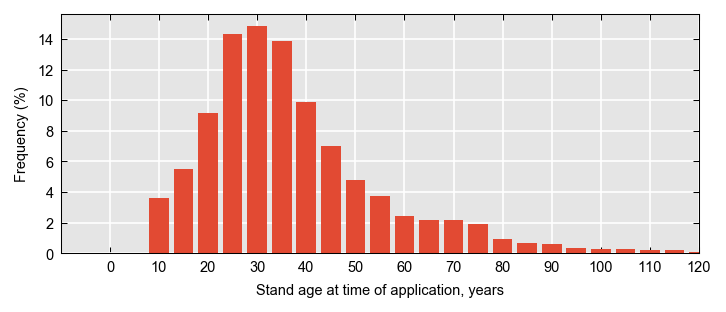

In [12]:
ppu.Plot_AgeAtFert(AgeAtFert)

In [13]:
AgeAtFert=ppu.Calc_AgeAtTimeOfFert_FromDisturbanceDBs(meta,dmec)

Mean age at time of fert (from Disturbance DBs) = 46.0
Median age at time of fert (from Disturbance DBs) = 36.0


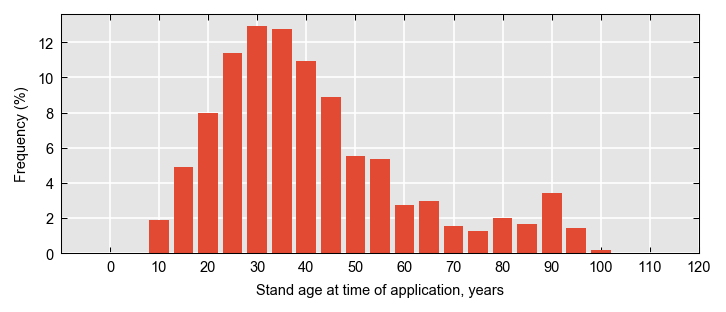

In [14]:
ppu.Plot_AgeAtFert(AgeAtFert)

## Annual probability of harvest

In [15]:
tsf,Occ,Pa,cnt=ppu.Calc_AnnProbHarvest_Vs_TimeSinceFert(meta,dmec)

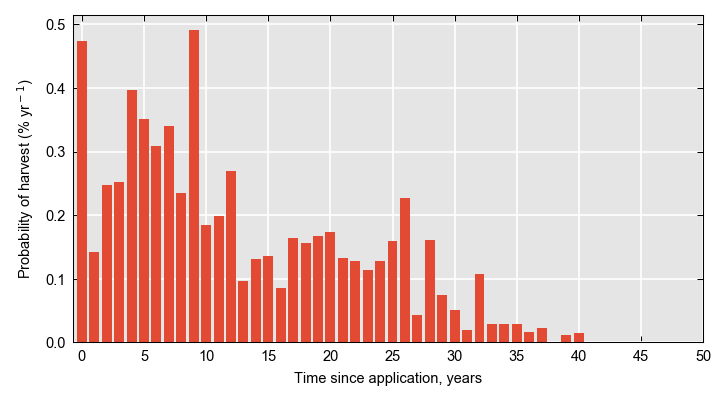

In [16]:
ppu.Plot_AnnProbHarvest(tsf,Pa)

## Time between fertilization and harvest

In [17]:
tbfh=ppu.Calc_TimeBtwnFertAndHarvest(meta,dmec)

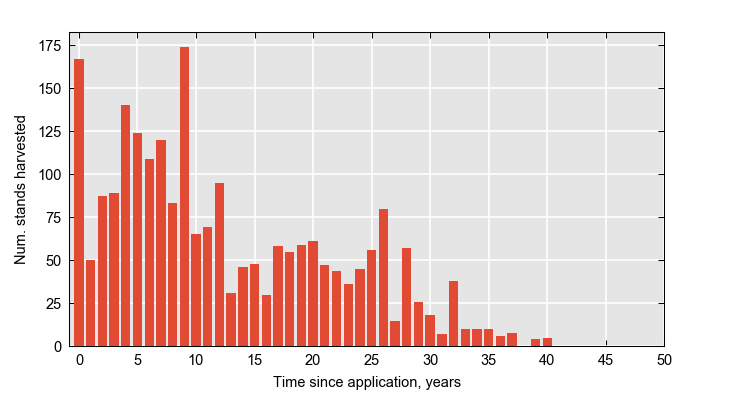

In [18]:
ppu.Plot_TimeBtwnFertAndHarvest(tbfh)

In [19]:
# Clean species composition - TIPSY will not recognize certain codes
meta,dmec,vri,fcinv=invu.Clean_Species_Composition(meta,dmec,vri,fcinv)

## Species composition

In [20]:
namSpc,ntSpc,pSpc=ppu.Extract_SpeciesComposition(meta,ba)

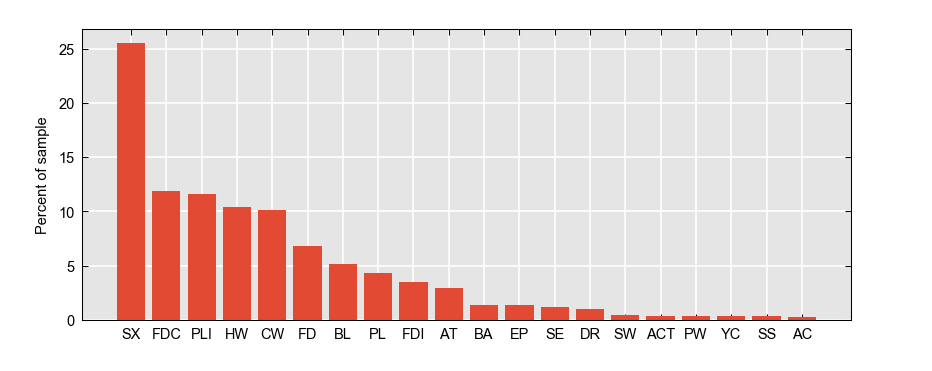

In [21]:
stop_at=20 
ppu.Plot_SpeciesComp(namSpc,pSpc,stop_at)

## BGC zone composition

In [22]:
nam,n=ppu.Calc_BGCZone_Composiiton(meta,ba)

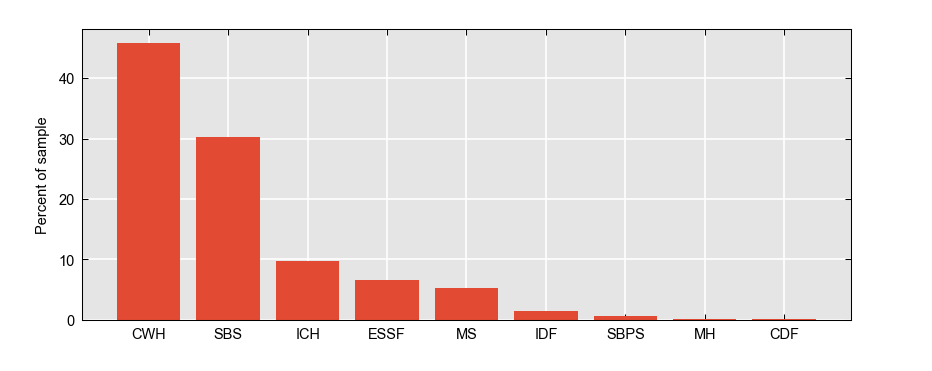

In [23]:
ppu.Plot_BGC_Zone_Composition(nam,n/np.sum(n)*100)

## Site index

In [24]:
ppu.Calc_SiteIndex(meta,ba)

Mean site index (coast) = 29.0
Mean site index (interior) = 20.0
Mean site index (all) = 24.0


## Scraps

In [25]:
#d=ppu.Calc_PrecedingDisturbance(meta,dmec)

In [26]:
# Results        
#{'No history': 49963, (82%)
# 'Harvest': 258610,
# 'Wildfire, stand replacing': 0,
# 'Wildfire, partial': 19415, (6%)
# 'Insects, stand replacing': 0,
#'Insects, partial': 39203} (12%)      

#Atot=0
#for k in d.keys():
#    Atot=Atot+d[k]
#dr=d.copy()
#for k in d.keys():
#    dr[k]=d[k]/Atot*100

# Look at age at time of fert
# plt.hist(AgeAtFert[AgeAtFert>0],np.arange(0,200,10))
#np.mean(AgeAtFert[AgeAtFert>0])